Eye Tracking
======
In this tutorial, you will learn:

1. Plotting Eye Position Over Time
2. Plotting Pupil Size Over Time
3. Creating an Eye Position Scatter Plot

Getting Started
---------------

Be sure you've installed the *Allen SDK Package*.

If you haven't, follow this link: [Allen SDK Package Installation](http://localhost:8000/beginners/installation/)

Import Libraries
-----------------

Let's begin by importing the necessary Libraries. They are as follow:

* **BrainObservatoryCache** contains functions for accessing and parsing our data 
* **pprint** for formatting out data, making it easy to read
* **NoEyeTrackingException** let's you know an if an experiment does not have eye tracking data
* **pyplot** provides a MATLAB-like plotting framework

In [1]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
import pprint
from allensdk.brain_observatory.brain_observatory_exceptions import NoEyeTrackingException
from matplotlib import pyplot as plt
#the line below is necessary for running matplotlib within a jupyter notebook.
%matplotlib inline

Right away, we will grab an nwb file for an aribitrary ophys experiment session. We will save the nwb file to a variable *data_set*.

In [2]:
boc = BrainObservatoryCache(manifest_file='boc/manifest.json') 
data_set = boc.get_ophys_experiment_data(569407590)


## 1. Plotting Eye Position Over Time

For this, we will use the *get_pupil_location()* method. This will provide us with two arrays that we can store to the variables *timestamp* and *location*. 
Following that, we can use the **pyplot**, as plt, to create our figure features.

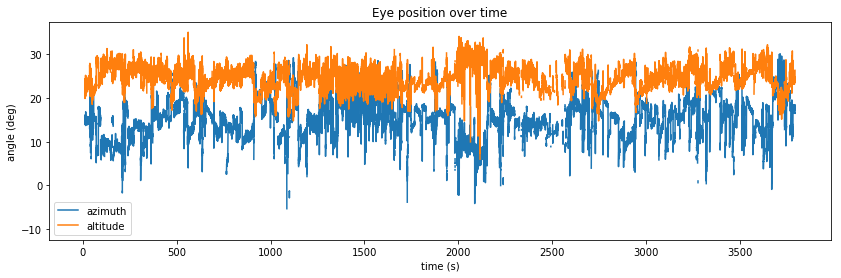

In [6]:
#save the pupil location data 
timestamps, locations = data_set.get_pupil_location()

#create the figure 
plt.figure(figsize=(14,4))
plt.plot(timestamps, locations.T[0])
plt.plot(timestamps, locations.T[1])
plt.title("Eye position over time")
plt.xlabel("time (s)")
plt.ylabel("angle (deg)")
plt.legend(['azimuth', 'altitude'])
plt.show()

## 2. Plotting Pupil Size Over Time

Following this, we can also implement the *get_pupil_size()* method to retrieve data on the fluctuations in the area of the mouse pupil over time. 

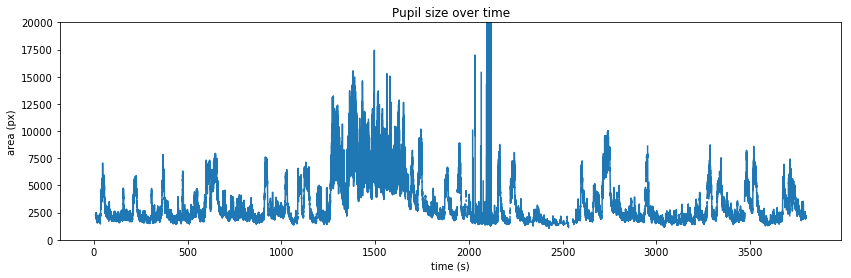

In [4]:
timestamps, area = data_set.get_pupil_size()
plt.figure(figsize=(14,4))
plt.plot(timestamps, area)
plt.title("Pupil size over time")
plt.xlabel("time (s)")
plt.ylabel("area (px)")
plt.ylim(0, 20000)
plt.show()

## 3. Creating an Eye Position Scatter Plot

As with earlier in the tutorial, where you retrieved the mouse eye position, we can use that information to create a scatter plot as shown below.  

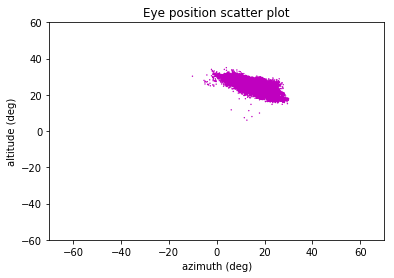

In [5]:
plt.figure()
plt.scatter(locations.T[0], locations.T[1], s=2, c="m", edgecolor="")
plt.title("Eye position scatter plot")
plt.xlim(-70, 70)
plt.ylim(-60, 60)
plt.xlabel("azimuth (deg)")
plt.ylabel("altitude (deg)")
plt.show()